## importing the essentials

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
print(df.duplicated().sum())
print(df.isnull().sum())
print(df.info())

403
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [6]:
df.rename(columns={'v1':'target','v2':'texts' }, inplace=True)
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
# encod = LabelEncoder()
# df['target'] =  encod.fit_transform(df['target'])
mp = {'spam':0,
      'ham':1}
df['target'] =  df['target'].map(mp)

In [8]:
df = df.drop_duplicates(keep='first')

## creating the new feature to get more insights

In [9]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\A C E
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\A C E
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
df['text_char'] = df['texts'].apply(len)
df['word_num'] = df['texts'].apply(lambda x : len(nltk.word_tokenize(x)))
df['sent_num'] = df['texts'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [11]:
df.head()

,target,texts,text_char,word_num,sent_num
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## Data processing (text)

- lowercase
- token
- special char
- stopword and punchtuation 
- stemming

In [12]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer

pc = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\A C E
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def text_process(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    for i in text :
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(pc.stem(i))
    return " ".join(y) # passing it as a string

In [14]:
text_process('I am testing This as the function is working correctly or not , TesT %??')

'test function work correctli test'

In [15]:
df['Transformed_text'] = df['texts'].apply(text_process)

In [16]:
df.head(1)

,target,texts,text_char,word_num,sent_num,Transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


## EDA

In [17]:
df[df['target'] == 0].describe().T #for spam

,count,mean,std,min,25%,50%,75%,max
target,653.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
text_char,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
word_num,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
sent_num,653.0,2.970904,1.488425,1.0,2.0,3.0,4.0,9.0


In [18]:
df[df['target'] == 1].describe().T #for not spam

,count,mean,std,min,25%,50%,75%,max
target,4516.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
text_char,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
word_num,4516.0,17.123782,13.493970,1.0,8.0,13.0,22.0,220.0
sent_num,4516.0,1.820195,1.383657,1.0,1.0,1.0,2.0,38.0


<Axes: ylabel='count'>

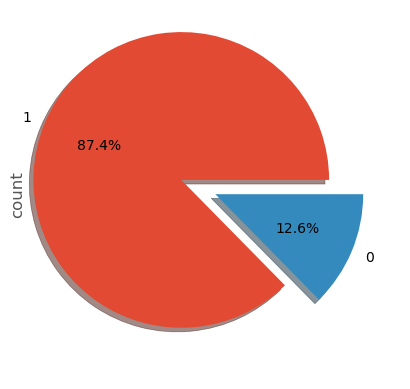

In [19]:
df['target'].value_counts().plot.pie(autopct = "%1.1f%%", explode = [0.25, 0], shadow = True)

the data is highly biased

In [20]:
df.head(2)

,target,texts,text_char,word_num,sent_num,Transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


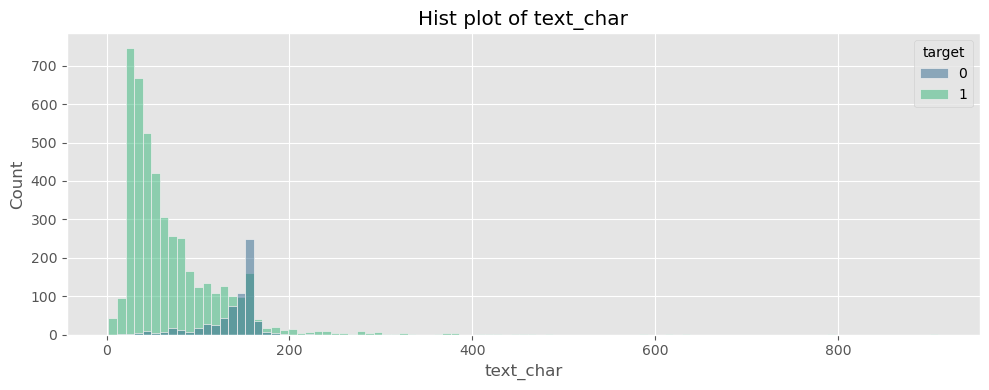

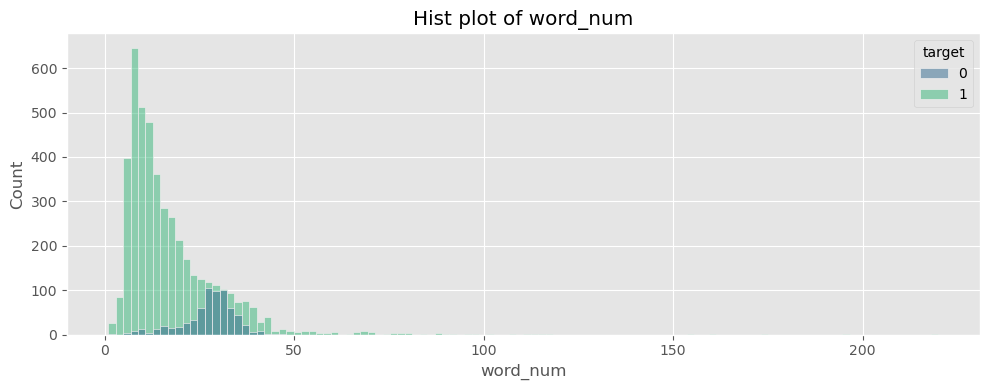

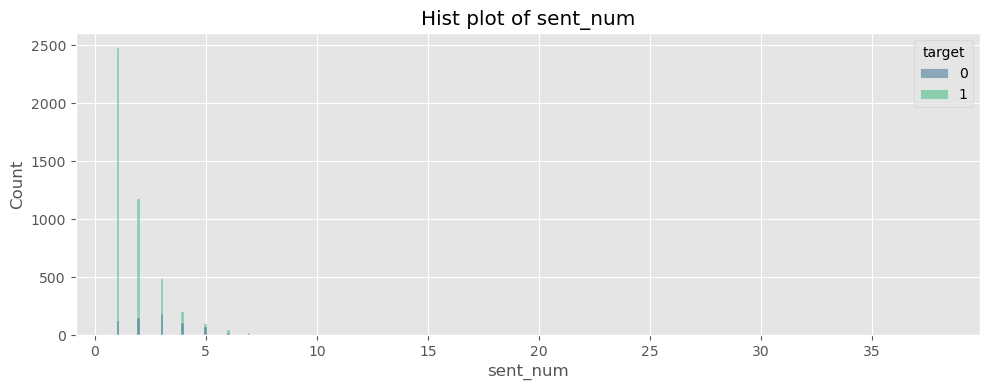

In [21]:
eda = [
    'text_char', 'word_num', 'sent_num'
]
for i in eda:
    plt.figure(figsize=(10,4))
    sns.histplot(data = df , x= i, palette='viridis', hue="target")
    plt.title(f'Hist plot of {i}')
    plt.tight_layout()
    plt.show()

In [22]:
df.corr(numeric_only=True)

,target,text_char,word_num,sent_num
target,1.000000,-0.384717,-0.262912,-0.263939
text_char,-0.384717,1.000000,0.965760,0.624139
word_num,-0.262912,0.965760,1.000000,0.679971
sent_num,-0.263939,0.624139,0.679971,1.000000


### Wordcloud

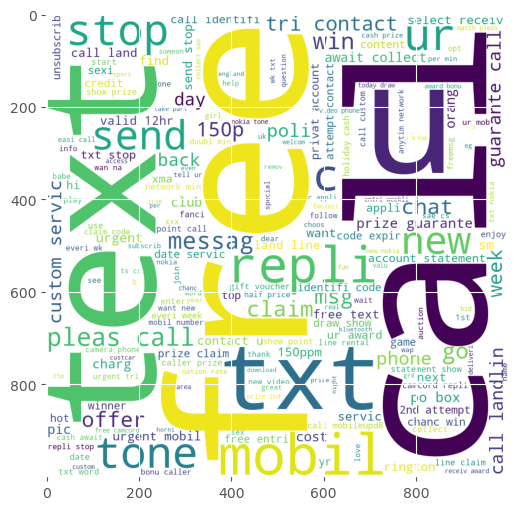

In [23]:
from wordcloud import WordCloud
plt.figure(figsize=(8,6))
wc = WordCloud(width = 1000, height = 1000, min_font_size = 12, background_color = 'white')
figu = wc.generate(df[df['target']== 0]['Transformed_text'].str.cat(sep=' '))
plt.tight_layout()
plt.imshow(figu)

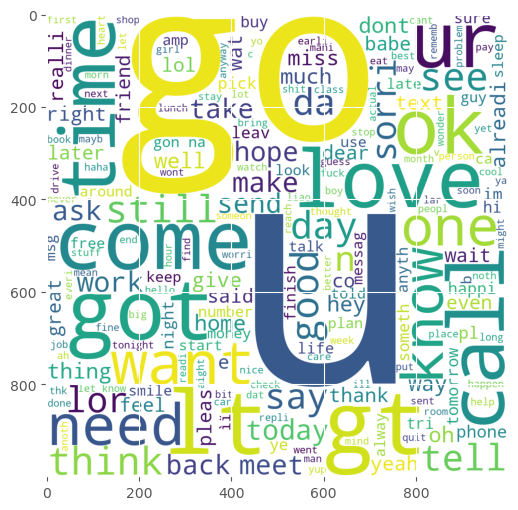

In [24]:
plt.figure(figsize=(8,6))
wc = WordCloud(width = 1000, height = 1000, min_font_size = 12, background_color = 'white')
figu = wc.generate(df[df['target']== 1]['Transformed_text'].str.cat(sep=' '))
plt.tight_layout()
plt.imshow(figu)

### Most used words

In [25]:
# for spam
spam_a = []
for msg in df[df['target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        spam_a.append(word)

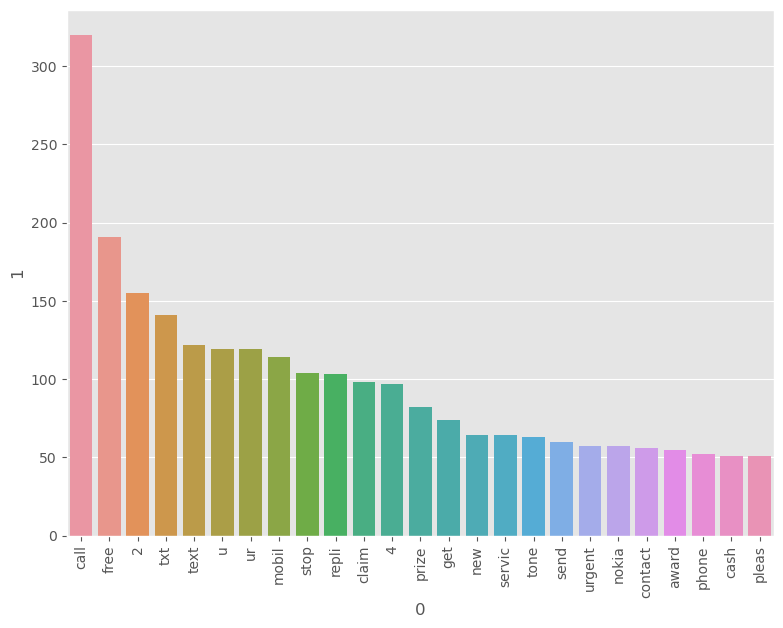

In [26]:
from collections import Counter

# for spam
plt.figure(figsize=(8,6))
sns.barplot(x = pd.DataFrame(Counter(spam_a).most_common(25))[0],y= pd.DataFrame(Counter(spam_a).most_common(25))[1])
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

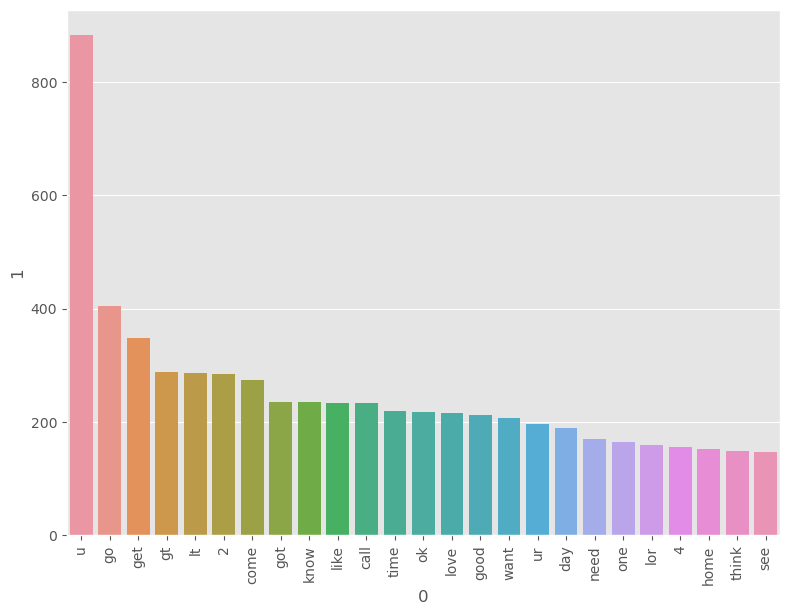

In [27]:
ham_a = []
for msg in df[df['target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        ham_a.append(word)
# for ham
plt.figure(figsize=(8,6))
sns.barplot(x = pd.DataFrame(Counter(ham_a).most_common(25))[0],y= pd.DataFrame(Counter(ham_a).most_common(25))[1])
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

## Model Selection

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from scipy.stats import uniform, loguniform
from scipy.stats import uniform, randint, loguniform


In [29]:
cv = CountVectorizer()
tv = TfidfVectorizer()
X = cv.fit_transform(df['Transformed_text']).toarray()
y = df['target']

In [30]:
x_train,x_test,y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

In [31]:
def Processing_data(classifier, x_train,x_test,y_train,y_test):
    classifier.fit(x_train, y_train)
    ypred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, ypred)
    precision = precision_score(y_test, ypred)
    confusion = confusion_matrix(y_test, ypred)

    return accuracy,precision, confusion


In [32]:
# classifiers = {
#     'lg' : LGBMClassifier(),
#     'Mnb' : MultinomialNB(),
#     'LR' : LogisticRegression(random_state=42),
#     "KN" : KNeighborsClassifier(),
#     'xg' : XGBClassifier(),
#     'Gnb' : GaussianNB(),
#     'Bnb' : BernoulliNB(),
#     'SVC' : LinearSVC(),
# }



In [33]:

best_classifiers = {
    'lg' : LGBMClassifier(),
    'Mnb' : MultinomialNB(),

}

param_distributions = {
    'lg': {
        'learning_rate': loguniform(1e-3, 0.1),
        'n_estimators': randint(100, 500),
        'num_leaves': randint(20, 80),
        'max_depth': randint(3, 8),
        'subsample': uniform(0.7, 0.3),
        'colsample_bytree': uniform(0.7, 0.3)
    },
    'Mnb': {
        'alpha': uniform(0.1, 2.0),
        'fit_prior': [True, False]
    }
}
best_params = {}
for name, best_classifier in best_classifiers.items():
    search = RandomizedSearchCV(
        estimator=best_classifier,
        param_distributions=param_distributions[name],
        n_iter=50,
        n_jobs=2,
        random_state=42
    )

    search.fit(x_train, y_train)
    best_params[name] = search.best_params_

  File "a:\Py\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "a:\Py\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "a:\Py\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "a:\Py\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 3620, number of negative: 515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 338
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875453 -> initscore=1.950062
[LightGBM] [Info] Start training from score 1.950062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [34]:
Final_accuracy = []
Final_precision = []
for key, best_classifier in best_classifiers.items():
    accuracy,precision, confusion = Processing_data(best_classifier, x_train, x_test, y_train, y_test)

    print(f'For model {key} :')
    print(f'CM: {confusion}')
    print('-'*100)

    Final_accuracy.append(accuracy)
    Final_precision.append(precision)

[LightGBM] [Info] Number of positive: 3620, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 338
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875453 -> initscore=1.950062
[LightGBM] [Info] Start training from score 1.950062
For model lg :
CM: [[120  18]
 [ 10 886]]
----------------------------------------------------------------------------------------------------
For model Mnb :
CM: [[126  12]
 [ 25 871]]
----------------------------------------------------------------------------------------------------


In [35]:
model_result_CV = pd.DataFrame({'Classifiers': best_classifiers.keys(), 'Accuracy': Final_accuracy, 'Precision' : Final_precision}).sort_values('Precision', ascending=False)

In [36]:
model_result_CV

,Classifiers,Accuracy,Precision
1,Mnb,0.964217,0.986410
0,lg,0.972921,0.980088


In [37]:
# model_result_Tfid

# Classifiers	Accuracy	Precision
# 2	xg	0.974855	0.980132
# 3	lg	0.970986	0.978982
# 7	SVC	0.974855	0.975930
# 6	Bnb	0.970019	0.969598
# 4	Gnb	0.876209	0.969438
# 5	Mnb	0.959381	0.955224
# 0	LR	0.946809	0.943098
# 1	KN	0.900387	0.896897

In [38]:
# best_params

# 'lg': {'colsample_bytree': 0.9243156321692241,
#   'learning_rate': 0.08056449590587102,
#   'max_depth': 7,
#   'n_estimators': 401,
#   'num_leaves': 72,
#   'subsample': 0.8716877407512514},
#  'Mnb': {'alpha': 2.0223440486986983, 'fit_prior': True}